In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import warnings
from datetime import datetime, date, time

# 엑셀 파일을 읽을 때 글꼴, 정렬, 테두리 등의 기본 스타일이 지정되어 있지 않으면 경고 메시지 출력해줌 이 때 경고메시지를 숨기고 싶을 때 다음과 같은 코드 작성
warnings.filterwarnings("ignore")

# 데이터 병합
file_list = os.listdir('./')
file_list_xlsx = [file for file in file_list if file.endswith('.xlsx')]
file_list_xlsx

['대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2014_hr.xlsx',
 '대전태평(암반)_2009_hr.xlsx']

In [13]:
df = pd.DataFrame() # 빈 데이터프레임 객체 생성
for file_name in file_list_xlsx:
    data = pd.read_excel(f'./{file_name}')
    df = pd.concat([df, data])  # 데이터가 합쳐짐
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20130101,0,16.4,44.30,740
1,대전태평,(암반),20130101,1,16.4,44.30,740
2,대전태평,(암반),20130101,2,16.4,44.30,740
3,대전태평,(암반),20130101,3,16.4,44.30,740
4,대전태평,(암반),20130101,4,16.4,44.30,740
...,...,...,...,...,...,...,...
8619,대전태평,(암반),20091231,19,16.2,44.47,741
8620,대전태평,(암반),20091231,20,16.2,44.47,741
8621,대전태평,(암반),20091231,21,16.2,44.47,741
8622,대전태평,(암반),20091231,22,16.2,44.47,741


In [15]:
# 인덱스 재설정
df.sort_values(by=['날짜', '시간'], inplace=True)
df
df.reset_index(inplace=True, drop=True)
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
69543,대전태평,(암반),20161231,19,16.2,44.49,725
69544,대전태평,(암반),20161231,20,16.2,44.49,725
69545,대전태평,(암반),20161231,21,16.2,44.49,725
69546,대전태평,(암반),20161231,22,16.2,44.49,725


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69548 entries, 0 to 69547
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       69548 non-null  object 
 1   구분        69548 non-null  object 
 2   날짜        69548 non-null  int64  
 3   시간        69548 non-null  int64  
 4   수온(℃)     69548 non-null  float64
 5   수위(el.m)  69548 non-null  float64
 6   EC(㎲/㎝)   69548 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.7+ MB


In [17]:
df['Date'] = pd.to_datetime(df['날짜'], format='%Y%m%d') + pd.to_timedelta(df['시간'], unit='h')
df.set_index('Date', inplace=True)
df.head()

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
Date,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749
2009-01-01 03:00:00,대전태평,(암반),20090101,3,16.1,44.47,749
2009-01-01 04:00:00,대전태평,(암반),20090101,4,16.1,44.47,749


In [18]:
df2 = df[['수온(℃)', '수위(el.m)', 'EC(㎲/㎝)']]
df2.columns = ['temp', 'level', 'EC']
df2

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749
2009-01-01 03:00:00,16.1,44.47,749
2009-01-01 04:00:00,16.1,44.47,749
...,...,...,...
2016-12-31 19:00:00,16.2,44.49,725
2016-12-31 20:00:00,16.2,44.49,725
2016-12-31 21:00:00,16.2,44.49,725


In [22]:
df2.isnull().sum()

temp     0
level    0
EC       0
dtype: int64

In [23]:
df2.to_csv('대전지하수.csv', encoding='utf-8')

In [24]:
df2.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


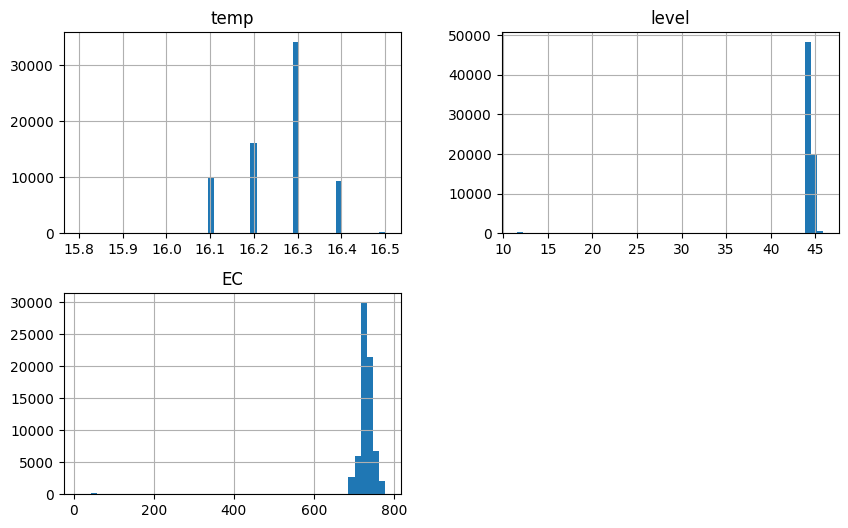

In [25]:
# 맷플롯립 라이브러리가 import되어 있으면 pandas가 알아서 그래프를 그려줌
df2.hist(bins=50, figsize=(10, 6))
plt.show()  # plt가 가지고 있는 이미지를 메모리에서 제거


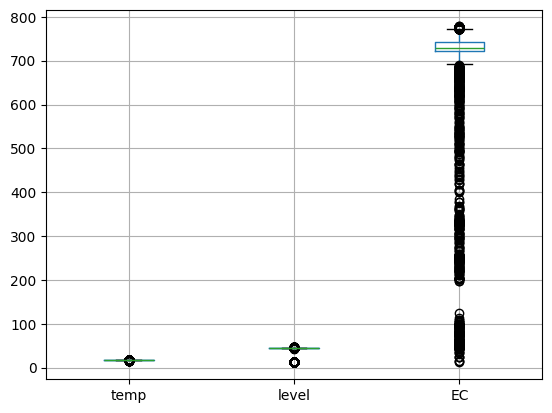

In [33]:
df2.boxplot()
plt.show()

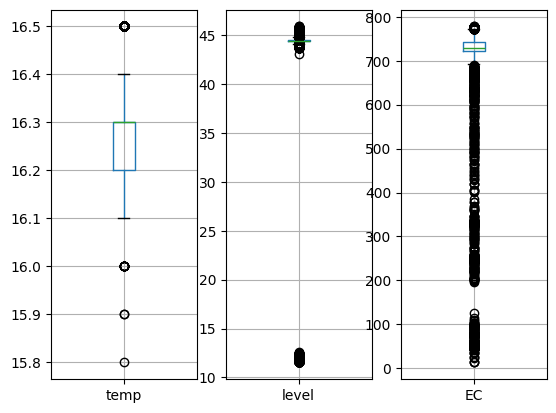

In [32]:
plt.subplot(1, 3, 1)
df2.boxplot(column='temp')
plt.subplot(1, 3, 2)
df2.boxplot(column='level')
plt.subplot(1, 3, 3)
df2.boxplot(column='EC')
plt.show()

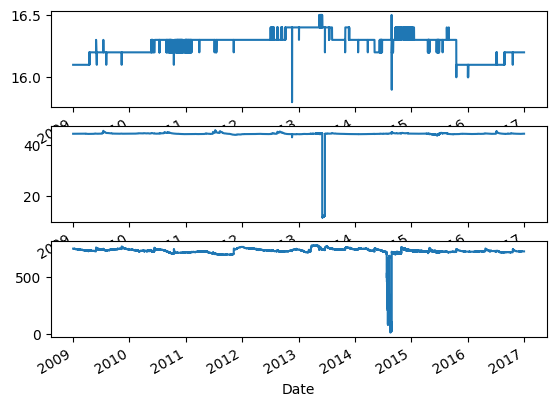

In [34]:
# 다중 시계열 그래프
plt.subplot(3, 1, 1)
df2['temp'].plot()
plt.subplot(3, 1, 2)
df2['level'].plot()
plt.subplot(3, 1, 3)
df2['EC'].plot()
plt.show()